In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')
 


In [4]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

#### a) Class distribution
We can observe that we have least number of dry beans of Bombay Variety and most number of beans of of Dermason variety

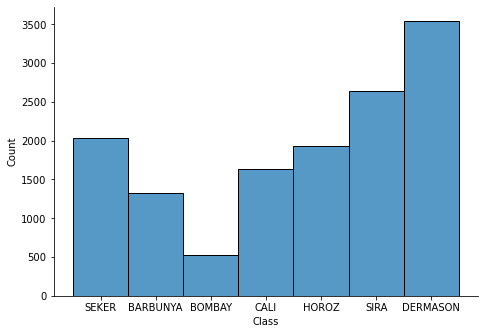

In [5]:

graph  = sns.displot(df, x="Class")
graph.fig.set_figwidth(7.27)
graph.fig.set_figheight(4.7) 



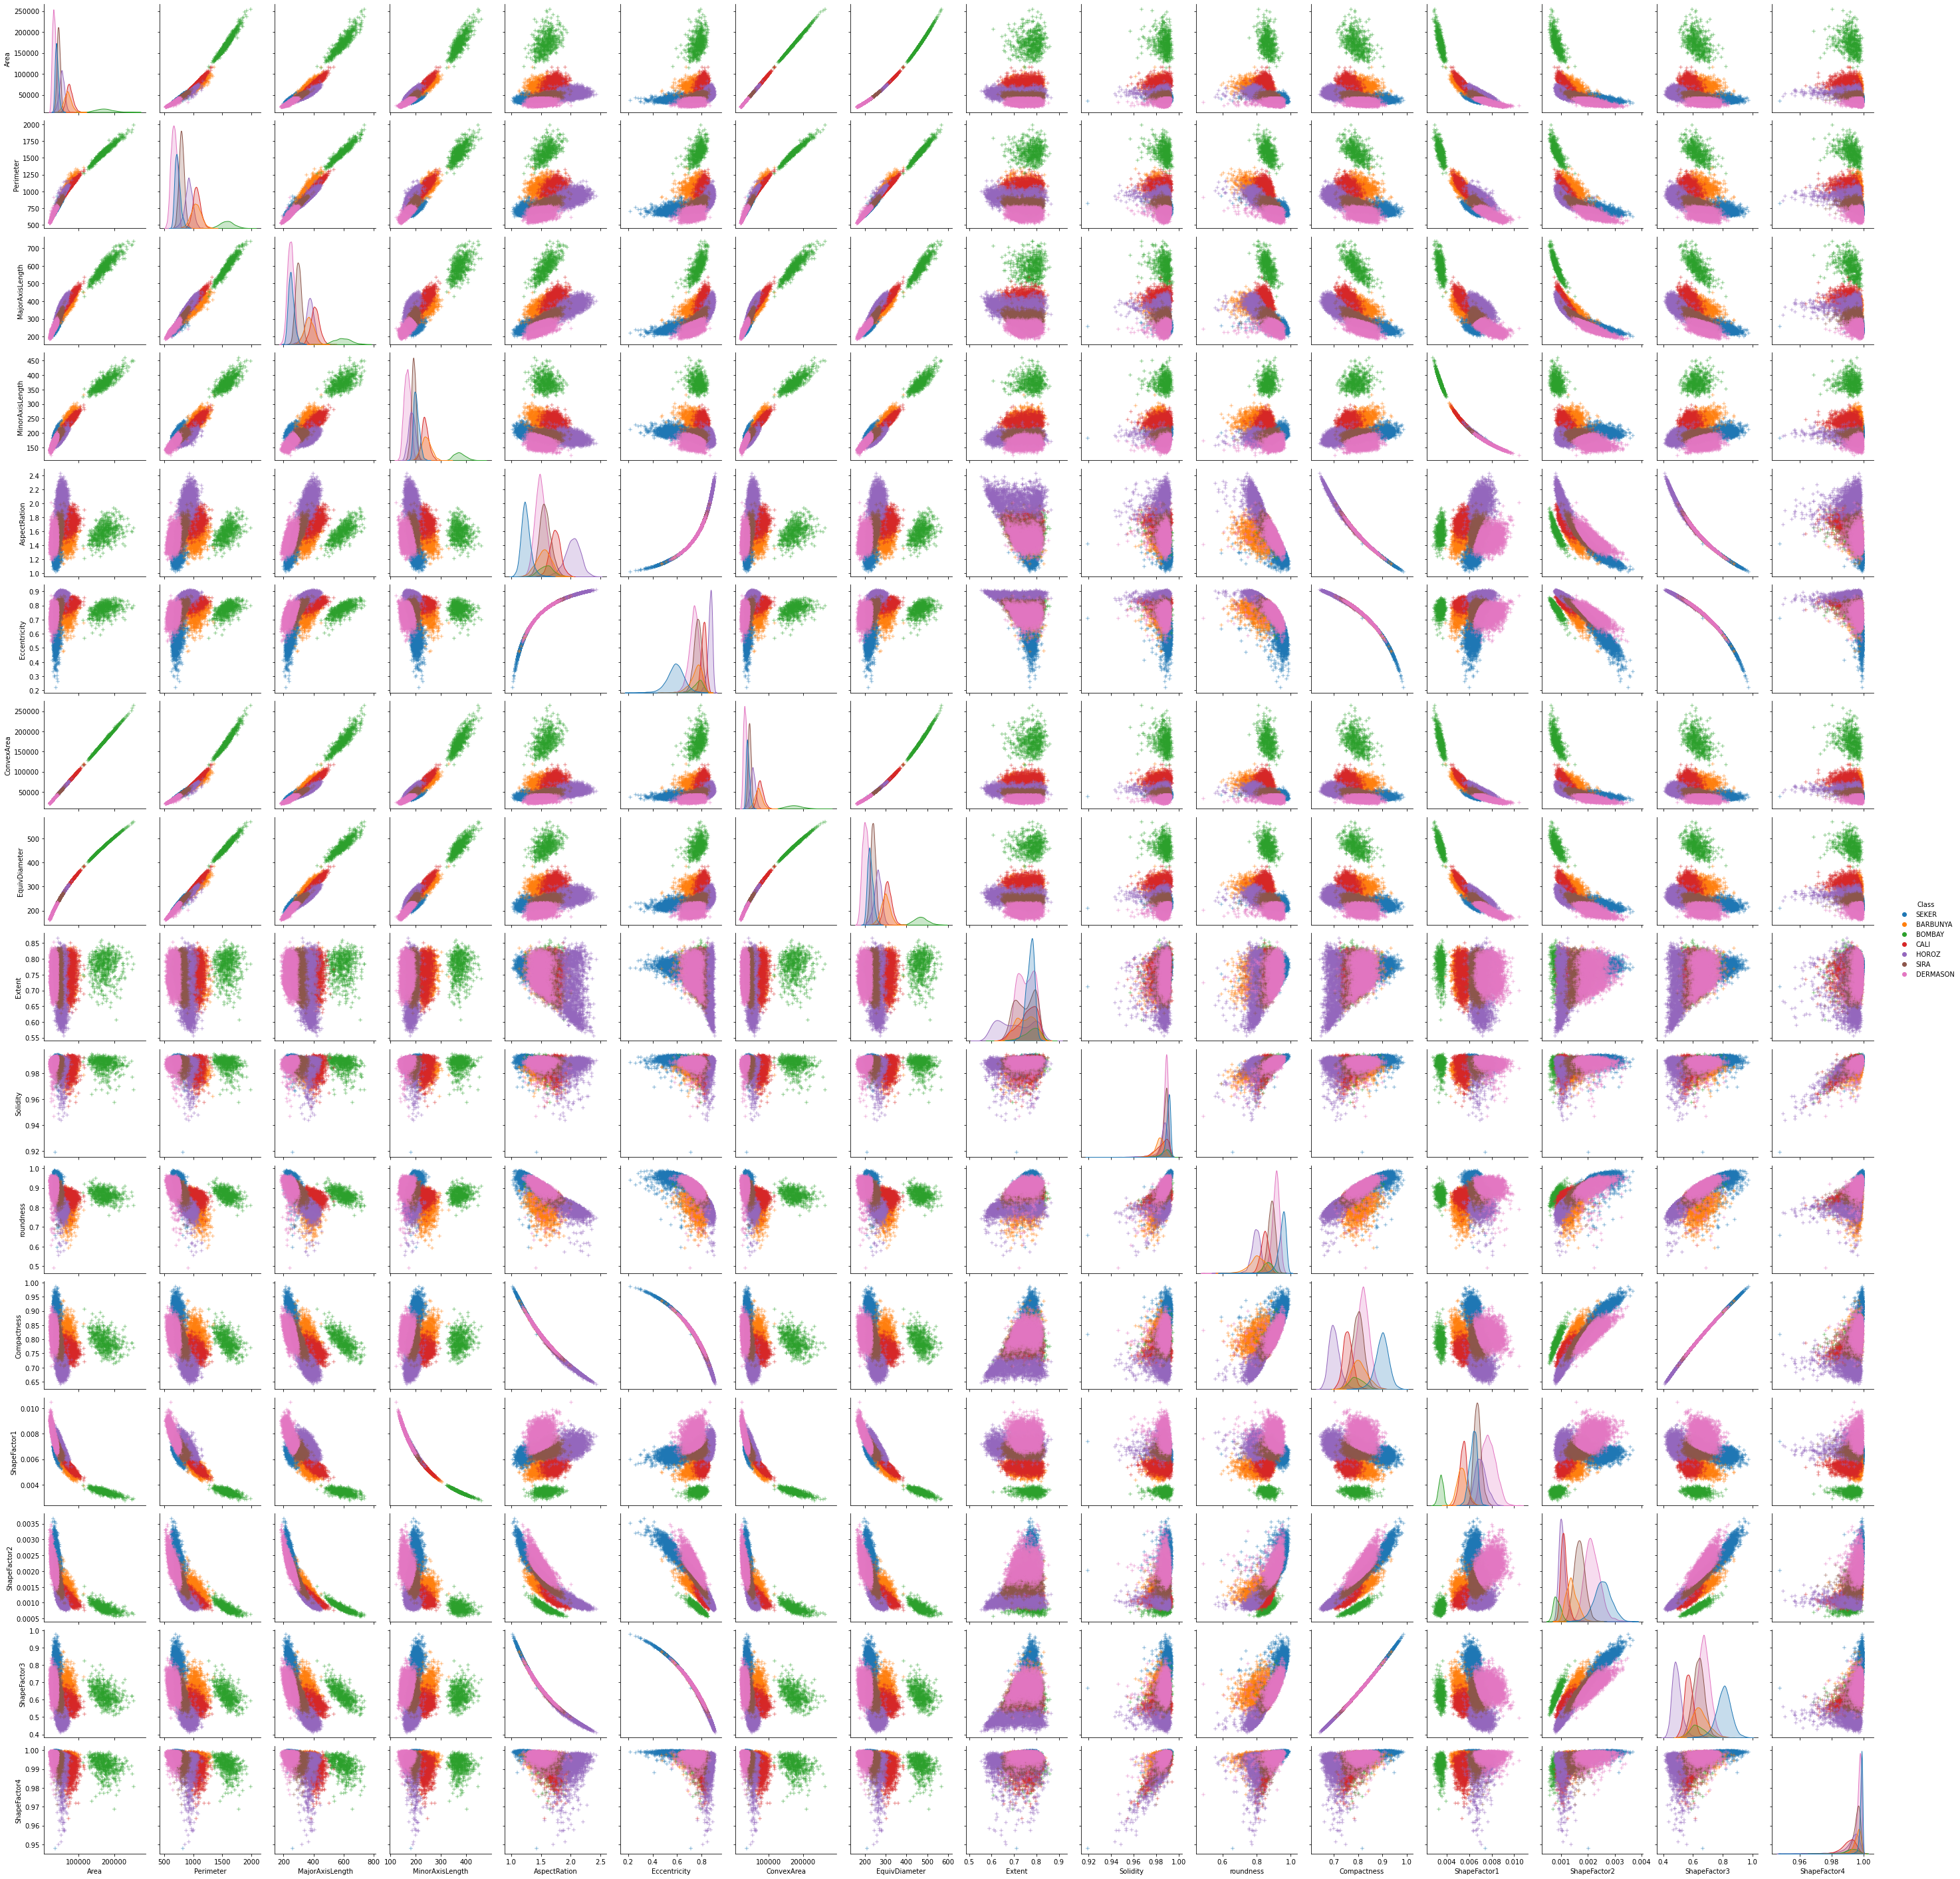

In [6]:
g = sns.pairplot(df, hue='Class', markers='+')

#### b) EDA

##### (i) BoxPlot for Eccentrvity - As we can see below , that many values less that 0.6 are outliers and cause major deviation to the data

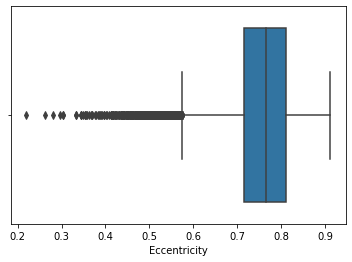

In [7]:
graph = sns.boxplot(x='Eccentricity', data=df)  

##### (ii) Scatter Plot for Area/Perimeter  - 
Here we can see that the graph is non linear as the rate with which Area increases as permeter increases (m - slope) is increasing
We can Also see that the BOMBAY beans are the the biggest with largest area and perimeter
And the DERMASON are the smallest

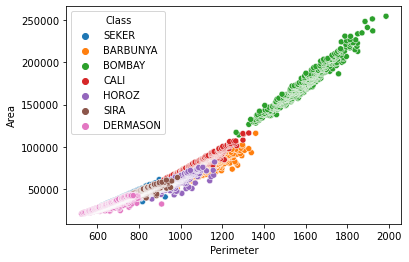

In [8]:
# df.plot.scatter(x = 'Perimeter', y = 'Area', s = 1)
graph = sns.scatterplot(x = 'Perimeter' , y='Area' , hue='Class' , data=df)



##### (iii) Scatter Plot for Roundness/Class  -
Here we can see  that SEKER are the most round and compact beans, whereas the HOROZ are least round and compact
The compactness and roundness of BOMBAY beans are somewhat between SEKER and HOROZ

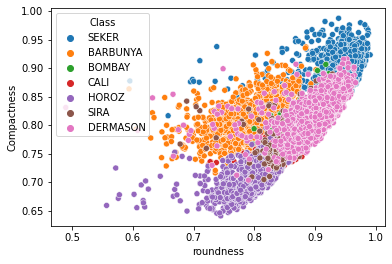

In [9]:
graph = sns.scatterplot(x = 'roundness' , y='Compactness' , hue='Class' , data=df)


##### iv. Graph between area and extent : Here we can see how all beans lie in same range of except HOROZ which has larger extent range.
We can also see that BOMBAY is very much different from others in Area

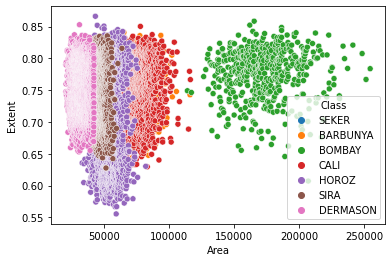

In [10]:
graph = sns.scatterplot(x = 'Area' , y='Extent' , hue='Class' , data=df)


##### v. Graph between Eccentricity and Aspect Ratio : We can see that this is an exponential curve
SEKER has the least eccentricity and least Aspect Ratio
While HOROZ has the highest Eccentricity and hightest Aspect Ration

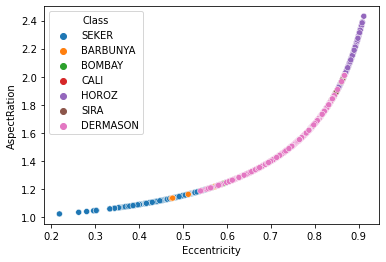

In [11]:
graph = sns.scatterplot(x = 'Eccentricity' , y='AspectRation', hue='Class'  , data=df)


Missing Values in the data set

In [12]:
df.isnull().sum()  ## there are no null values in the data set.



Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### C ) Use TSNE (t-distributed stochastic neighbor embedding) algorithm to reduce data dimensions to 2

In [13]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df[df.columns[0:16].values])
tsne_features[ 1:4,:]

df['x'] = tsne_features [ : , 0]
df['y' ] = tsne_features [:,1] 

## Reference Taken from scikit-learn.org


# This will add 2 new columns to the df if needed in case of future use

ScatterPlot

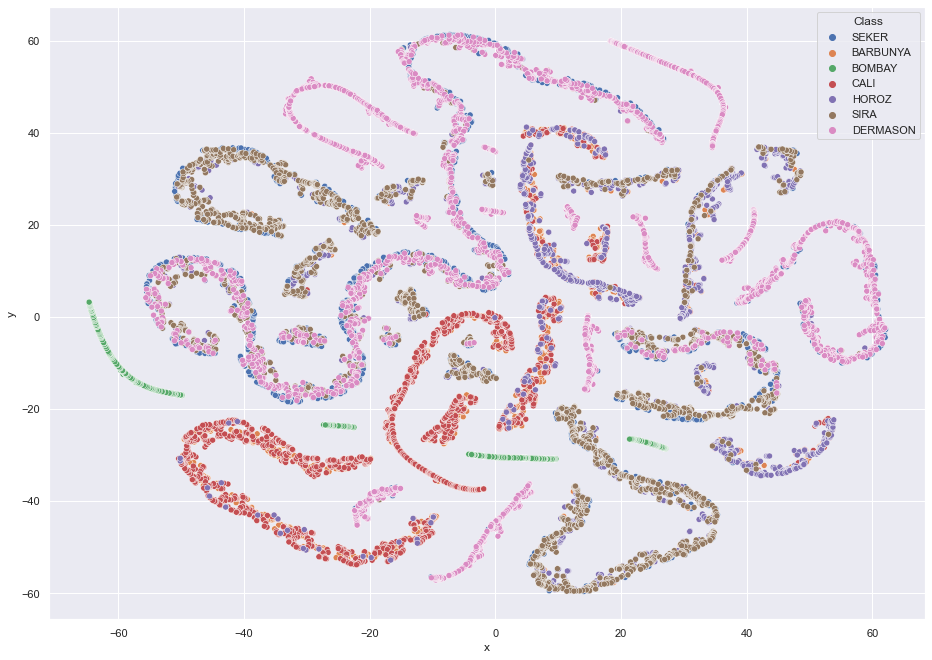

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,11.27)})

graph = sns.scatterplot(x = 'x' , y='y' , hue='Class' , data=df)


We can infer that HOROZ and CALI are similiar to each other
Also are HOROZ and SIRA
SEKER and SIRA are also similiar
SEKER and DERAMASON are also similiar
SEKER, CALI and BARBUNIYA are also simliar
CALI and BARBUNIYA are most similiar to each other
However DERAMASON is different from others in some aspects
However BOMBAY is completely different from all others

#### 4. Naive Bayes


i.  Multinomial Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_MNV = df[df.columns[19:20]]
X_MNV = df[df.columns[0:16]]
X_train_MNV, X_test_MNV, y_train_MNV, y_test_MNV = train_test_split(X_MNV, y_MNV, test_size=0.2, random_state=0)

clf = MultinomialNB()
# df

## Reference Taken from scikit-learn.org

# Multinomial Naive Bayes is used for multinomial models, suitable for classification with discrete (integer) features.


We have added one more column ClassCode which represents Class but  in integer form

In [16]:
clf.fit(X_MNV, y_MNV)
MultinomialNB()
y_pred_MNV = clf.predict(X_test_MNV)
y_pred_MNV = y_pred_MNV.reshape(y_pred_MNV.shape[0] , 1)
print("Number of mislabeled points out of a total %d points : %d"% (X_test_MNV.shape[0], (y_test_MNV != y_pred_MNV).sum()))

## Reference Taken from scikit-learn.org





Number of mislabeled points out of a total 2723 points : 582


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_MNV , y_pred_MNV))

print(classification_report(y_test_MNV , y_pred_MNV)) 

Accuracy Score 0.786265148733015
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       255
           1       1.00      1.00      1.00        92
           2       0.77      0.72      0.74       350
           3       0.87      0.87      0.87       735
           4       0.82      0.77      0.80       390
           5       0.77      0.76      0.77       376
           6       0.73      0.81      0.77       525

    accuracy                           0.79      2723
   macro avg       0.79      0.79      0.79      2723
weighted avg       0.79      0.79      0.79      2723



So we are getting Accuracy as 0.786 , Precision as 0.79  ,recall as 0.79 for Multinomial Naive Bayes

ii. Categorial naive Bayes

In [18]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

clf = CategoricalNB()
df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_CNB = df[df.columns[19:20]]
X_CNB = df[df.columns[0:16]]


## Reference Taken from scikit-learn.org


In [19]:
X_train_CNB, X_test_CNB, y_train_CNB, y_test_CNB = train_test_split(X_CNB, y_CNB, test_size=0.2, random_state=0)

clf.fit(X_CNB, y_CNB)
CategoricalNB()
y_pred_CNB = clf.predict(X_test_CNB)
y_pred_CNB = y_pred_CNB.reshape(y_pred_CNB.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_CNB , y_pred_CNB))

print(classification_report(y_test_CNB , y_pred_CNB)) 


##Reference Taken from scikit-learn.org


Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



So we are getting Accuracy as 0.906 , Precision as 0.91  ,recall as 0.91 for Categorial Naive Bayes

We Chose Multinomial Naive Bayes and Categorial Naive Bayes as they provided most accuracy among all other Naive Bayes.
From what all I could infer after reading the documentation and the Dataset Values
Since we have multiple features , Multinomial Naive Bayes provided high (79%) accuracy 
Since we had categorised data (Class values) , Categorial naive Bayes provided high (90%) accuracy

#### e . Use Principal Component Analysis (PCA) to reduce the number of features and use the reduced data set for model training using Categorial Naive Bayes

We will first Normalise (Preprocess the data) , to get integers for Classes 

If we reduce to 4 features

In [20]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA


df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_PCA = df[df.columns[19:20]]
X_PCA = df[df.columns[0:16]]

pca = decomposition.PCA(n_components=4)   ## we are taking in 4 components
pca.fit(X_PCA)  
scores = pca.transform(X_PCA)

pca_2 = pca

scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2' , 'PC3' , 'PC4' ])  ## Creating a new dataframe 
scores_df

# ##
print("PCA results with 4 features")
print("Variance: " , pca.explained_variance_ratio_.sum())

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=0)

clf.fit(X_PCA, y_PCA)
CategoricalNB()    ##Training the model using Categorial Naive bayes
y_pred_PCA = clf.predict(X_test_PCA)
y_pred_PCA = y_pred_PCA.reshape(y_pred_PCA.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_PCA , y_pred_PCA))

print(classification_report(y_test_PCA , y_pred_PCA)) 


## Reference Taken from scikit-learn.org



PCA results with 4 features
Variance:  0.9999999749408085
Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



If we reduce to 6 features

In [21]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA


df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_PCA = df[df.columns[19:20]]
X_PCA = df[df.columns[0:16]]

pca = decomposition.PCA(n_components=6)
pca.fit(X_PCA)
scores = pca.transform(X_PCA)

pca_2 = pca

scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2' , 'PC3' , 'PC4' , 'PC5' , 'PC6'])
scores_df

##
print("PCA results with 6 features")

print("Variance : " ,pca.explained_variance_ratio_.sum())

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=0)

clf.fit(X_PCA, y_PCA)
CategoricalNB()
y_pred_PCA = clf.predict(X_test_PCA)
y_pred_PCA = y_pred_PCA.reshape(y_pred_PCA.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_PCA , y_pred_PCA))

print(classification_report(y_test_PCA , y_pred_PCA)) 
## Reference Taken from scikit-learn.org





PCA results with 6 features
Variance :  0.999999999997927
Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



If we reduce to 8 features


In [22]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA


df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_PCA = df[df.columns[19:20]]
X_PCA = df[df.columns[0:16]]

pca = decomposition.PCA(n_components=8)
pca.fit(X_PCA)
scores = pca.transform(X_PCA)

pca_2 = pca

scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2' , 'PC3' , 'PC4' , 'PC5' , 'PC6' , 'PC7' , 'PC8'])
scores_df

##
print("PCA results with 8 features")

print("Variance : " ,pca.explained_variance_ratio_.sum())

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=0)

clf.fit(X_PCA, y_PCA)
CategoricalNB()
y_pred_PCA = clf.predict(X_test_PCA)
y_pred_PCA = y_pred_PCA.reshape(y_pred_PCA.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_PCA , y_pred_PCA))

print(classification_report(y_test_PCA , y_pred_PCA)) 


## Reference Taken from scikit-learn.org






PCA results with 8 features
Variance :  0.9999999999998419
Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



if we reduce to 10 features

In [23]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA


df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_PCA = df[df.columns[19:20]]
X_PCA = df[df.columns[0:16]]

pca = decomposition.PCA(n_components=10)
pca.fit(X_PCA)
scores = pca.transform(X_PCA)

pca_2 = pca

scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2' , 'PC3' , 'PC4' , 'PC5', 'PC6' , 'PC7' , 'PC8' , 'PC9' , 'PC10'])
scores_df

##
print("PCA results with 10 features")

print("Variance : " ,pca.explained_variance_ratio_.sum())

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=0)

clf.fit(X_PCA, y_PCA)
CategoricalNB()
y_pred_PCA = clf.predict(X_test_PCA)
y_pred_PCA = y_pred_PCA.reshape(y_pred_PCA.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_PCA , y_pred_PCA)) 

print(classification_report(y_test_PCA , y_pred_PCA)) 


## Reference Taken from scikit-learn.org





PCA results with 10 features
Variance :  0.9999999999999931
Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



if we reduce to 12 features

In [24]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA


df['Class'] = pd.Categorical(df['Class'])
df['ClassCode'] = df['Class'].cat.codes
## Pre processing added a columns which assign specific numbers to the Class do that we can classify using integers
y_PCA = df[df.columns[19:20]]
X_PCA = df[df.columns[0:16]]

pca = decomposition.PCA(n_components=12)
pca.fit(X_PCA)
scores = pca.transform(X_PCA)

pca_2 = pca

scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2' , 'PC3' , 'PC4' , 'PC5', 'PC6' , 'PC7' , 'PC8' , 'PC9' , 'PC10' , 'PC11' , 'PC12'])
scores_df

##
print("PCA results with 12 features")

print("Variance : " ,pca.explained_variance_ratio_.sum())

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=0)

clf.fit(X_PCA, y_PCA)
CategoricalNB()
y_pred_PCA = clf.predict(X_test_PCA)
y_pred_PCA = y_pred_PCA.reshape(y_pred_PCA.shape[0] , 1)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_PCA , y_pred_PCA)) 

print(classification_report(y_test_PCA , y_pred_PCA)) 


## Reference Taken from scikit-learn.org





PCA results with 12 features
Variance :  1.0000000000000018
Accuracy Score 0.9063532868160118
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       255
           1       1.00      1.00      1.00        92
           2       0.91      0.93      0.92       350
           3       0.92      0.95      0.93       735
           4       0.92      0.89      0.91       390
           5       0.96      0.86      0.91       376
           6       0.82      0.90      0.85       525

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



#### f. plot the ROC-AUC curves Using the Categorial naive Bayes  (After PCA)

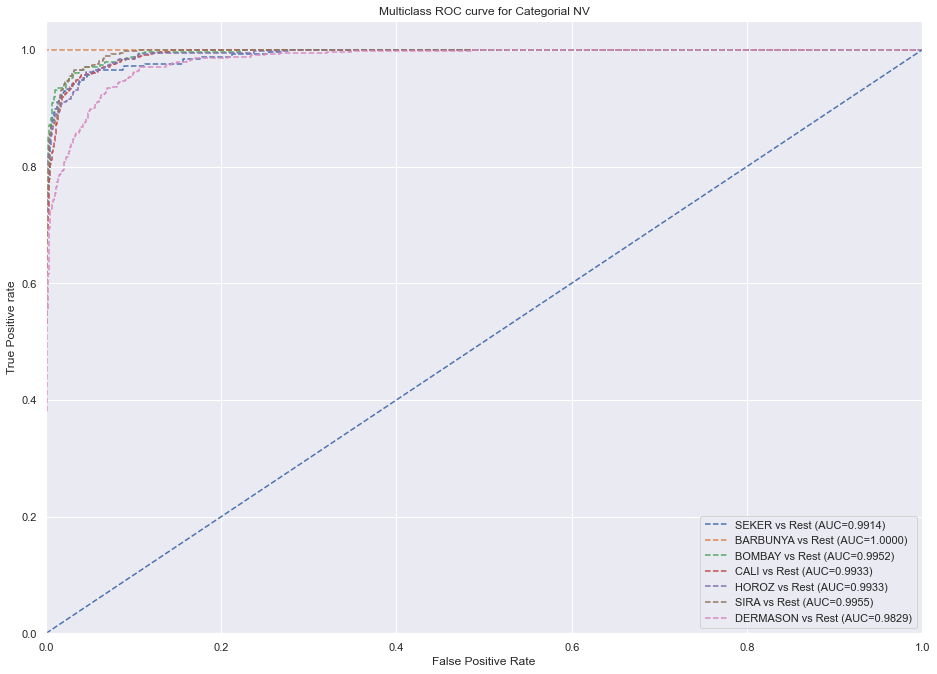

In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

y_test_binarized=label_binarize(y_test_PCA,classes=np.unique(y_test_PCA))
# print(y_test_binarized)
fpr = {}   ## false positive rate 
tpr = {}  ## true positive rate 
thresh ={}  ## threshold
roc_auc = dict()

pred_prob = clf.predict_proba(X_test_PCA)   ## plotting the ROC curve of Categorial Naive Bayes after PCA

n_class = 7
classes = df['Class'].unique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='--', label='%s vs Rest (AUC=%0.4f)'%(classes[i],roc_auc[i]))
    ## For Plotting the printing the AOC values on the curve

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for Categorial NV')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()


## Reference Taken from scikit-learn.org

# This is ROC Curve and AOC values for the Categorial Naive Bayes model for different Classes. (After PCA)
# The ROC curve plots the true positive rates and false positive rates showing the performance of our model.


    

 


Even though our model has high AUC
The model is easily able to distinguish the BARBUNIYA beans from the other beans as it has highest AUC = 1.
Where as the model not easily able to distinguish DERMASON beans from other beans as it has lowest AUC = 0.9829.

#### g. Using Sklearn’s implementation of Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression(max_iter=10000)  ## Setting the number of epochs

y_train_LG = df[df.columns[16:17]]  ## Selecting the X and Y columns
X_train_LG = df[df.columns[0:16]]


# df[df.columns[16:17]]
X_train_LG, X_test_LG, y_train_LG, y_test_LG = train_test_split(X_train_LG,y_train_LG, test_size=0.2)
model.fit(X_train_LG, y_train_LG)   ## SK learn model


LogisticRegression(max_iter=10000)

In [27]:
y_pred_LG = model.predict(X_test_LG)   

model.score(X_test_LG, y_test_LG)


0.9188395152405435

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print("Accuracy Score" , accuracy_score(y_test_LG, y_pred_LG))

print(classification_report(y_test_LG , y_pred_LG)) 

Accuracy Score 0.9188395152405435
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       260
      BOMBAY       1.00      0.99      1.00       101
        CALI       0.92      0.95      0.94       312
    DERMASON       0.90      0.92      0.91       719
       HOROZ       0.95      0.97      0.96       377
       SEKER       0.95      0.93      0.94       405
        SIRA       0.87      0.85      0.86       549

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



We have taken 10000 iterations for logistic regression
We are getting
Accuracy : 0.9210429673154609 
Precision : 0.92
Recall : 0.92
F-1 Score : 0.92

These results are better than the results obtained from The Naive Bayes models